# Imports

In [1]:
import dataset
import manip
import preprocessing

import torch

In [2]:
# Data loading, cleaning, and pair formation
data, basenames = manip.loader('./data/')
data, basenames = manip.drop_nan(data, basenames)
pairs = manip.generate_pairs(data, basenames)
pairs = manip.shuffle_balance_data(pairs)

In [3]:
# Data preprocessing
pair_data = pairs[:, :-1]
pair_data = preprocessing.process_data(pair_data)
pair_labels = pairs[:, -1]

In [4]:
# Load dataset
ds = dataset.PairDataset()
ds.load_dataset(pair_data)
ds.load_labels(pair_labels)
ds.choose_subset('train')

| parameter | value |
| - | - |
| model | 100, 100|
|lr| 0.005|
|optim| adamw|
|batchsize| 2000|
|final| 0.4053|


| parameter | value |
| --------- | ----- |
| model | 200, 200 |
| lr | 0.001 |
| optim | adamw |
| batchsize | 2000 |
| final | 0.3982 |


| parameter | value |
| --------- | ----- |
| model | 200, 200 |
| lr | 0.005 |
| optim | adamw |
| batchsize | 3000 |
| final | 0.3624 |

In [6]:
# Build sequential ANN model
model = torch.nn.Sequential(
    torch.nn.Linear(6, 200),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 200),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 200),
    torch.nn.ReLU(),
    torch.nn.Linear(200, 2),
    torch.nn.ReLU(),
    torch.nn.LogSoftmax(dim=1)
)

device = torch.device("cuda")
model = model.cuda()

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=0.005)
train_loader = torch.utils.data.DataLoader(dataset=ds, batch_size=3000, shuffle=True, drop_last=True, num_workers=0)

num_epochs = 500
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        one_hot_labels = torch.nn.functional.one_hot(labels, num_classes=2).float()
        loss = criterion(outputs, one_hot_labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    avg_loss = running_loss / len(train_loader)
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}")

Epoch [1/500], Loss: 0.5878
Epoch [2/500], Loss: 0.5671
Epoch [3/500], Loss: 0.5605
Epoch [4/500], Loss: 0.5486
Epoch [5/500], Loss: 0.5387
Epoch [6/500], Loss: 0.5295
Epoch [7/500], Loss: 0.5206
Epoch [8/500], Loss: 0.5186
Epoch [9/500], Loss: 0.5208
Epoch [10/500], Loss: 0.5177
Epoch [11/500], Loss: 0.5162
Epoch [12/500], Loss: 0.5169
Epoch [13/500], Loss: 0.5163
Epoch [14/500], Loss: 0.5146
Epoch [15/500], Loss: 0.5159
Epoch [16/500], Loss: 0.5052
Epoch [17/500], Loss: 0.4712
Epoch [18/500], Loss: 0.4641
Epoch [19/500], Loss: 0.4647
Epoch [20/500], Loss: 0.4632
Epoch [21/500], Loss: 0.4637
Epoch [22/500], Loss: 0.4621
Epoch [23/500], Loss: 0.4617
Epoch [24/500], Loss: 0.4595
Epoch [25/500], Loss: 0.4596
Epoch [26/500], Loss: 0.4583
Epoch [27/500], Loss: 0.4587
Epoch [28/500], Loss: 0.4576
Epoch [29/500], Loss: 0.4566
Epoch [30/500], Loss: 0.4564
Epoch [31/500], Loss: 0.4546
Epoch [32/500], Loss: 0.4559
Epoch [33/500], Loss: 0.4542
Epoch [34/500], Loss: 0.4526
Epoch [35/500], Loss: 0

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [50]:
n = 6
dat = [np.fromfile(f'training/model_{i}.out') for i in range(0,n)]

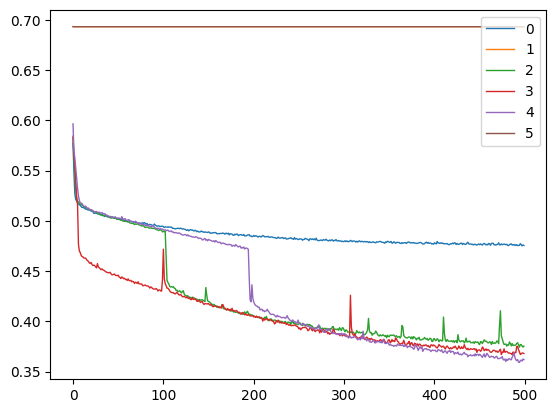

In [60]:
[plt.plot(np.arange(0,500), x, linewidth=1) for x in dat]

plt.legend([str(i) for i in range(0,n)], loc='upper right')

In [ ]:
files = [os.path.join()]